# สร้างโปรไฟล์แนวดิ่งเพื่อวิเคราะห์โมเม้นต์

2022.12.20

* ลิงก์โค้ดหลัก https://github.com/openradar/AMS-Short-Course-on-Open-Source-Radar-Software/blob/master/7_Mapping_to_a_cartesian_grid.ipynb
* ลิงก์โค้ดที่น่าสนใจในการวิเคราะห์เรดาร์ฝนลุ่มน้ำ pyart ARM มีการซ้อนทับ DEM ด้วย https://arm-development.github.io/sail-xprecip-radar/radar-precip/plot-ams-figures.html

In [1]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
from time import time
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:33: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _matplotlib_version = LooseVersion(_matplotlib_version)
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mpl_required_version = LooseVersion('0.98')


In [2]:
# Set up the number of scans to read in
# Use this on low memory systems (VMs, etc)
# to read only the first sweep
scans = [0, 1, 2, 3] # ใช้ 4 มุมยกของเรดาร์เชียงราย

# Use the follow to read all of the sweeps 
# on systems with sufficient memory.
#scans = None

In [3]:
#filenames = ['./0data/0Hail_CRI23Apr2020/CRI240@202004231145.uf']

#radars = [pyart.io.read(filename, scans=scans) for filename in filenames]
radars = pyart.io.read('./0data/0Hail_CRI23Apr2020/CRI240@202004231215.uf')

In [4]:
# See what moments are present.
radars.fields.keys()

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'specific_differential_phase'])

## gridding z

In [5]:
t1 = time()
grids_z = pyart.map.grid_from_radars(
         radars, grid_shape=(44, 250, 250),
        grid_limits=((0, 11000.0),(-200000, 200000), (-200000, 200000)),
        fields=['corrected_reflectivity'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')
print(time() - t1)

C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


3.3835647106170654


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


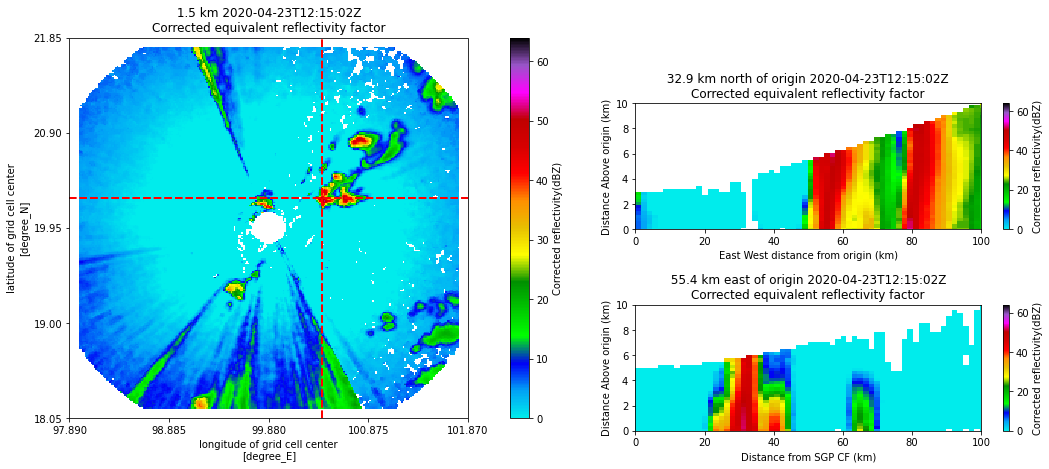

In [6]:
display_z = pyart.graph.GridMapDisplay(grids_z)
fig = plt.figure(figsize=[15, 7])

# panel sizes
#map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.90, 0.10, .4, .25]
y_cut_panel_axes = [0.90, 0.50, .4, .25]

# parameters
level = 6
vmin = 0
vmax = 64
lat = 20.250 #ตำแหน่งเชียงของ
lon = 100.412 #ตำแหน่งเชียงของ

# panel 1, basemap, radar reflectivity and NARR overlay
#ax1 = fig.add_axes(map_panel_axes)
#display.cartopy_political_boundaries()
#display.plot_basemap(lon_lines = np.arange(97.5, 102.5, 1) )
display_z.plot_grid('corrected_reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)
display_z.plot_crosshairs(lon=lon, lat=lat)
#-ตำแหน่งเชียงของ
display_z.plot_crosshairs(100.412, 20.250) 

#ax1.plot(99.881, 19.961, "b*", zorder=5, markersize=10)


# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display_z.plot_longitude_slice('corrected_reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap = pyart.graph.cm.NWSRef)
ax2.set_ylim([0,10])
ax2.set_xlim([0,100])
ax2.set_xlabel('Distance from SGP CF (km)')


# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,10])
ax3.set_xlim([0,100])
display_z.plot_latitude_slice('corrected_reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                           cmap = pyart.graph.cm.NWSRef)



## gridding CC

In [7]:
t1 = time()
grids_cc = pyart.map.grid_from_radars(
         radars, grid_shape=(44, 250, 250),
        grid_limits=((0, 11000.0),(-200000, 200000), (-200000, 200000)),
        fields=['cross_correlation_ratio'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')
print(time() - t1)

C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


3.5535030364990234


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


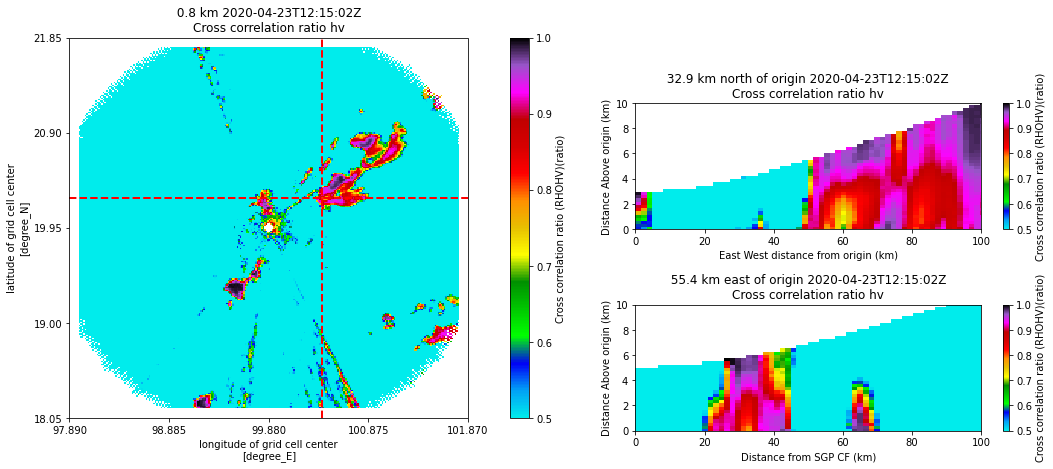

In [8]:
display_cc = pyart.graph.GridMapDisplay(grids_cc)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.90, 0.10, .4, .25]
y_cut_panel_axes = [0.90, 0.50, .4, .25]

# parameters
level = 3
vmin = 0.5
vmax = 1
lat = 20.250 #ตำแหน่งเชียงของ
lon = 100.412 #ตำแหน่งเชียงของ

# panel 1, basemap, radar reflectivity and NARR overlay
#ax1 = fig.add_axes(map_panel_axes)
#display.cartopy_political_boundaries()
#display.plot_basemap(lon_lines = np.arange(97.5, 102.5, 1) )
display_cc.plot_grid('cross_correlation_ratio', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)
display_cc.plot_crosshairs(lon=lon, lat=lat)


# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display_cc.plot_longitude_slice('cross_correlation_ratio', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap = pyart.graph.cm.NWSRef)
ax2.set_ylim([0,10])
ax2.set_xlim([0,100])
ax2.set_xlabel('Distance from SGP CF (km)')


# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,10])
ax3.set_xlim([0,100])
display_cc.plot_latitude_slice('cross_correlation_ratio', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                           cmap = pyart.graph.cm.NWSRef)



In [9]:
## gridding Zdr

In [10]:
t1 = time()
grids_zdr = pyart.map.grid_from_radars(
         radars, grid_shape=(44, 250, 250),
        grid_limits=((0, 11000.0),(-200000, 200000), (-200000, 200000)),
        fields=['corrected_differential_reflectivity'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')
print(time() - t1)

C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


3.5405614376068115


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


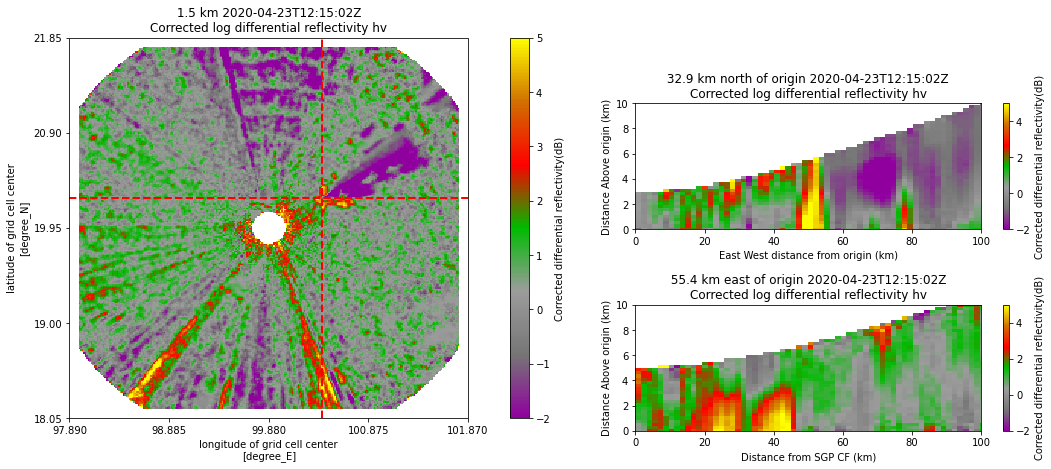

In [11]:
display_zdr = pyart.graph.GridMapDisplay(grids_zdr)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.90, 0.10, .4, .25]
y_cut_panel_axes = [0.90, 0.50, .4, .25]

# parameters
level = 6
vmin = -2
vmax = 5
lat = 20.250 #ตำแหน่งเชียงของ
lon = 100.412 #ตำแหน่งเชียงของ

# panel 1, basemap, radar reflectivity and NARR overlay
#ax1 = fig.add_axes(map_panel_axes)
#display.cartopy_political_boundaries()
#display.plot_basemap(lon_lines = np.arange(97.5, 102.5, 1) )
display_zdr.plot_grid('corrected_differential_reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = 'pyart_NWS_SPW')
display_zdr.plot_crosshairs(lon=lon, lat=lat)


# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display_zdr.plot_longitude_slice('corrected_differential_reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap = 'pyart_NWS_SPW')
ax2.set_ylim([0,10])
ax2.set_xlim([0,100])
ax2.set_xlabel('Distance from SGP CF (km)')


# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,10])
ax3.set_xlim([0,100])
display_zdr.plot_latitude_slice('corrected_differential_reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                           cmap = 'pyart_NWS_SPW')

* ต้องทำ gatefilter ของ SNR >> คำนวณค่า KDP และทำโปรไฟล์ต่อ
* จากนั้นนำภาพเฉพาะแนวละติจูดมาสร้าง subplot 4 ค่า ได้แก่ Z, Zdr, CC, Kdp

# พลอตโมเม้นเรดาร์สามค่า z, cc, zdr ด้วย logitude slice

In [12]:
# See what moments are present.
radars.fields.keys()

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'specific_differential_phase'])

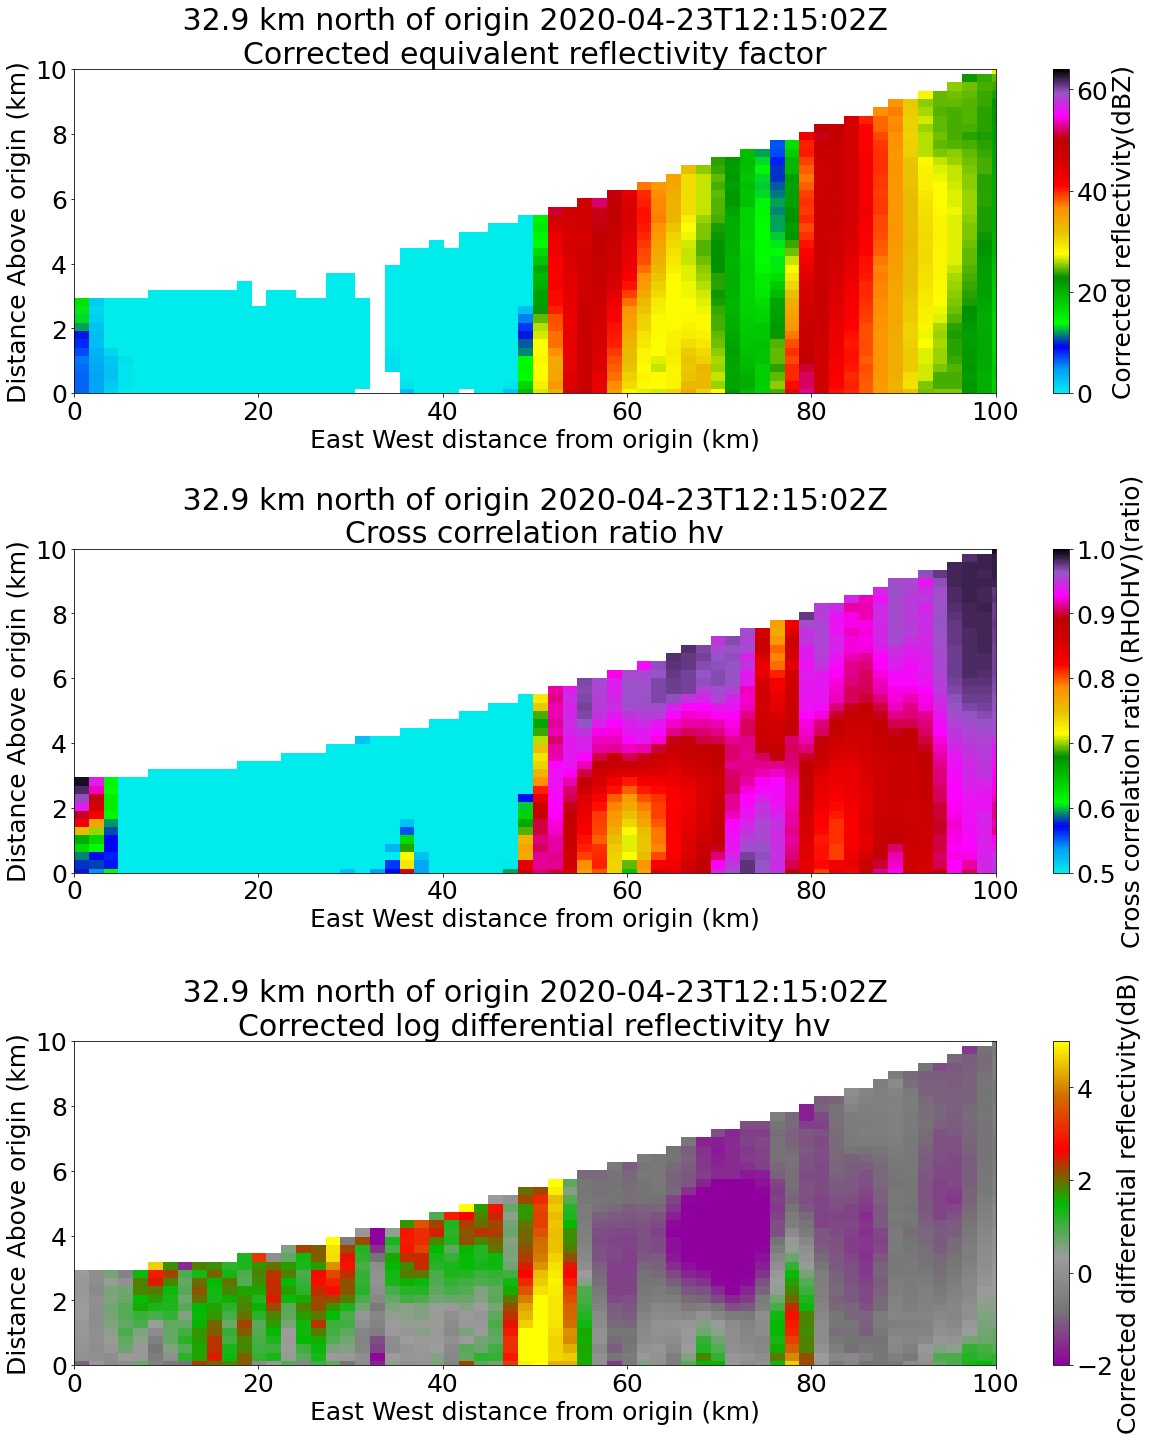

In [13]:
display_z = pyart.graph.GridMapDisplay(grids_z)
display_cc = pyart.graph.GridMapDisplay(grids_cc)
display_zdr = pyart.graph.GridMapDisplay(grids_zdr)
fig = plt.figure(figsize=[20, 18])
plt.rcParams['font.size'] = '25'

# panel sizes
fig1_panel_axes = [0.05, 1.0, .80, .25]
fig2_panel_axes = [0.05, 0.63, .80, .25]
fig3_panel_axes = [0.05, 0.25, .80, .25]


lat = 20.250 #ตำแหน่งเชียงของ
lon = 100.412 #ตำแหน่งเชียงของ

# panel 1, latitude slice zh.
ax1 = fig.add_axes(fig1_panel_axes)
display_z.plot_latitude_slice('corrected_reflectivity', lon=lon, lat=lat, vmin=0, vmax=64,
                            cmap = pyart.graph.cm.NWSRef)
ax1.set_ylim([0,10])
ax1.set_xlim([0,100])

# panel 2, latitude slice cc.
ax2 = fig.add_axes(fig2_panel_axes)
display_cc.plot_latitude_slice('cross_correlation_ratio', lon=lon, lat=lat, vmin=0.5, vmax=1.0,
                           cmap = pyart.graph.cm.NWSRef)
ax2.set_ylim([0,10])
ax2.set_xlim([0,100])


# panel 3, latitude slice zdr.
ax3 = fig.add_axes(fig3_panel_axes)
display_zdr.plot_latitude_slice('corrected_differential_reflectivity', lon=lon, lat=lat, vmin=-2, vmax=5.0,
                           cmap = 'pyart_NWS_SPW')
ax3.set_ylim([0,10])
ax3.set_xlim([0,100])

fig.savefig("./0output/fig10.png", dpi=300) 


# พลอตแผนที่และโมเมนเรดาร์สามค่า